In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import logit, ols
import statsmodels.api as sm
from patsy import dmatrices




import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from xgboost import XGBClassifier, XGBRegressor
# from catboost import CatBoostClassifier, CatBoostRegressor
# from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, mean_squared_error, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score


In [ ]:
! pip install stargazer

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#df = pd.read_csv('/content/drive/MyDrive/1991_2016 Donor Patient.csv')
df = pd.read_csv('G:/HFEA/1991_2016 Donor Patient.csv')

C:\Users\tsong\AppData\Local\Temp\ipykernel_23304\1072874560.py:2: DtypeWarning: Columns (53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('G:/HFEA/1991_2016 Donor Patient.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48799 entries, 0 to 48798
Data columns (total 60 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Patient Age at Treatment                                                  48799 non-null  object 
 1   Date patient started trying to become pregnant OR date of last pregnancy  48799 non-null  int64  
 2   Total number of previous pregnancies, Both IVF and DI                     48799 non-null  int64  
 3   Total number of IVF pregnancies                                           48799 non-null  int64  
 4   Total number of DI pregnancies                                            48799 non-null  int64  
 5   Type of Infertility - Female Primary                                      48799 non-null  int64  
 6   Type of Infertility - Female Secondary                        

In [6]:
df['is_ICSI'] = df['is_ICSI'].astype('bool')

In [7]:
df_birth = df[df['Heart One Success Birth'] == 1]

In [8]:
df['Patient Age at Treatment'].unique()

array(['35-37', '40-42', '38-39', '18 - 34', '43-44', '45-50', '999'],
      dtype=object)

In [9]:
df['Sperm Donor Age at Registration'].unique()

array(['31-35', '21-25', '<= 20', '26-30', '36-40', '41-45'], dtype=object)

## 2009 Legislative Change on Length of Storage of Frozen Egg, Sperm and Embryos up to 55 years  

In [10]:
df['Heart One Success Birth'] = df['Heart One Success Birth'].astype(int)
df['Fresh Eggs Stored'] = df['Fresh Eggs Stored'].astype(int)
df['Frozen Cycle'] = df['Frozen Cycle'].astype(int)
df['Live Birth Occurrence'] = df['Live Birth Occurrence'].astype(int)
df['is_Pulsation'] = df['is_Pulsation'].astype(int)
df['Embryos Stored For Use By Patient'] = df['Embryos Stored For Use By Patient'].astype(int)
df['is_ICSI'] = df['is_ICSI'].astype(int)

In [ ]:

# Create a binary variable indicating whether the observation is before or after the reform in 2009
df['Post_Reform'] = (df['Year of Treatment'] >= 2009).astype(int)

# Define the treatment group based on patients who had their eggs/sperm/embryos stored
df['Treatment_Group'] = df['Fresh Eggs Stored'] | df['Frozen Cycle'] | df['Embryos Stored For Use By Patient']


# Define the dependent variable and the independent variables
df_analysis = df[['Heart One Success Birth', 'Post_Reform', 'Treatment_Group']]

# Create the interaction term
df_analysis['Post_Reform_Treatment'] = df_analysis['Post_Reform'] * df_analysis['Treatment_Group']

# Fit the Difference-in-Differences model
formula = 'Q("Heart One Success Birth") ~ Post_Reform + Treatment_Group + Post_Reform_Treatment'
model = logit(formula, data=df_analysis).fit()



Optimization terminated successfully.
         Current function value: 0.557970
         Iterations 5


<ipython-input-17-35fbc4e6eb47>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['Post_Reform_Treatment'] = df_analysis['Post_Reform'] * df_analysis['Treatment_Group']


In [ ]:
stargazer = Stargazer([model])
stargazer

In [ ]:
html_output = stargazer.render_html()
html_output

'<table style="text-align:center"><tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr>\n<tr><td style="text-align:left"></td><td colspan="1"><em>Dependent variable: Q("Heart One Success Birth")</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td></tr>\n<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr>\n\n<tr><td style="text-align:left">Intercept</td><td>-1.298<sup>***</sup></td></tr>\n<tr><td style="text-align:left"></td><td>(0.017)</td></tr>\n<tr><td style="text-align:left">Post_Reform</td><td>0.260<sup>***</sup></td></tr>\n<tr><td style="text-align:left"></td><td>(0.024)</td></tr>\n<tr><td style="text-align:left">Post_Reform_Treatment</td><td>-0.012<sup></sup></td></tr>\n<tr><td style="text-align:left"></td><td>(0.008)</td></tr>\n<tr><td style="text-align:left">Treatment_Group</td><td>0.046<sup>***</sup></td></tr>\n<tr><td style="text-align:left"></td><td>(0.005)</td></tr>\n\n<td colspan="2" style="b

In [ ]:
df_analysis = df[['Live Birth Occurrence', 'Post_Reform', 'Treatment_Group']]

# Create the interaction term
df_analysis['Post_Reform_Treatment'] = df_analysis['Post_Reform'] * df_analysis['Treatment_Group']

# Fit the Difference-in-Differences model
formula = 'Q("Live Birth Occurrence") ~ Post_Reform + Treatment_Group + Post_Reform_Treatment'
model = logit(formula, data=df_analysis).fit()

Optimization terminated successfully.
         Current function value: 0.561716
         Iterations 5


<ipython-input-23-2647a4efadd9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['Post_Reform_Treatment'] = df_analysis['Post_Reform'] * df_analysis['Treatment_Group']


In [ ]:
stargazer = Stargazer([model])
stargazer

In [ ]:
df_analysis = df[['is_Pulsation', 'Post_Reform', 'Treatment_Group']]

# Create the interaction term
df_analysis['Post_Reform_Treatment'] = df_analysis['Post_Reform'] * df_analysis['Treatment_Group']

# Fit the Difference-in-Differences model
formula = 'Q("is_Pulsation") ~ Post_Reform + Treatment_Group + Post_Reform_Treatment'
model = logit(formula, data=df_analysis).fit()

Optimization terminated successfully.
         Current function value: 0.596821
         Iterations 5


<ipython-input-25-82e03e7f5c9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['Post_Reform_Treatment'] = df_analysis['Post_Reform'] * df_analysis['Treatment_Group']


In [ ]:
stargazer = Stargazer([model])
stargazer

## Test Male Age controlled for patient age and cause of interfility

In [ ]:
! pip install stargazer

In [11]:
from stargazer.stargazer import Stargazer

In [12]:
def stargazer_fit(result):
  p_values = result.pvalues
  significant_vars = p_values[p_values < 0.05].index.tolist()
  star = Stargazer([result])
  star.covariate_order(significant_vars)
  return star

In [21]:
df['Live Birth Occurrence'] = df['Live Birth Occurrence'].astype(bool)
df['is_Pulsation'] = df['is_Pulsation'].astype(bool)

In [22]:
formula_live_birth = 'Q("Live Birth Occurrence") ~ Q("Sperm Donor Age at Registration")'

formula_pulsation = 'Q("is_Pulsation") ~ Q("Sperm Donor Age at Registration")'

In [23]:
y_live_birth, X_live_birth = dmatrices(formula_live_birth, df, return_type='dataframe')
y_pulsation, X_pulsation = dmatrices(formula_pulsation, df, return_type='dataframe')

In [24]:
y_live_birth

,"Q(""Live Birth Occurrence"")[False]","Q(""Live Birth Occurrence"")[True]"
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
48794,0.0,1.0
48795,1.0,0.0
48796,1.0,0.0
48797,0.0,1.0


In [25]:
model_live_birth = sm.Logit(y_live_birth.iloc[:,1], X_live_birth)
result_live_birth = model_live_birth.fit()

print(result_live_birth.summary())

Optimization terminated successfully.
         Current function value: 0.563797
         Iterations 5
                                  Logit Regression Results                                  
Dep. Variable:     Q("Live Birth Occurrence")[True]   No. Observations:                48799
Model:                                        Logit   Df Residuals:                    48793
Method:                                         MLE   Df Model:                            5
Date:                              Tue, 16 Jul 2024   Pseudo R-squ.:               0.0007167
Time:                                      01:07:16   Log-Likelihood:                -27513.
converged:                                     True   LL-Null:                       -27532.
Covariance Type:                          nonrobust   LLR p-value:                 1.914e-07
                                                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

In [ ]:
stargazer_fit(result_live_birth)

In [ ]:
model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_pulsation)
result_pulsation = model_pulsation.fit()

print(result_pulsation.summary())

Optimization terminated successfully.
         Current function value: 0.599119
         Iterations 5
                              Logit Regression Results                             
Dep. Variable:     Q("is_Pulsation")[True]   No. Observations:                48799
Model:                               Logit   Df Residuals:                    48793
Method:                                MLE   Df Model:                            5
Date:                     Sat, 13 Jul 2024   Pseudo R-squ.:               0.0005628
Time:                             01:30:55   Log-Likelihood:                -29236.
converged:                            True   LL-Null:                       -29253.
Covariance Type:                 nonrobust   LLR p-value:                 3.896e-06
                                                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------

In [ ]:
stargazer_fit(result_pulsation)

In [26]:
sorted(df['Patient Age at Treatment'].unique())

['18 - 34', '35-37', '38-39', '40-42', '43-44', '45-50', '999']

In [27]:
l1 = {}
l2 = {}
for value in sorted(df['Patient Age at Treatment'].unique()):
  if value != '999':
    df_analysis = df[df['Patient Age at Treatment'] == value]

    formula_birth = 'Q("Live Birth Occurrence") ~ Q("Sperm Donor Age at Registration")'

    formula_pulsation = 'Q("is_Pulsation") ~ Q("Sperm Donor Age at Registration")'

    y_birth, X_birth = dmatrices(formula_birth, df_analysis, return_type='dataframe')
    y_pulsation, X_pulsation = dmatrices(formula_pulsation, df_analysis, return_type='dataframe')



    try:
      model_birth = sm.Logit(y_birth.iloc[:,1], X_birth)
      result_birth = model_birth.fit()
      l1[value] = result_birth
    except:
      pass

    try:
      model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_birth)
      result_pulsation = model_pulsation.fit()
      l2[value] = result_pulsation
    except:
      pass



Optimization terminated successfully.
         Current function value: 0.628900
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650930
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.586108
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.618465
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.529793
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570894
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.405433
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.476906
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.243866
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316816
  

In [29]:
table1 = Stargazer([item for key, item in l1.items()])
table1.custom_columns(list(l1.keys()))
table1

In [30]:
table2 = Stargazer([item for key, item in l2.items()])
table2.custom_columns(list(l2.keys()))
table2

In [ ]:
infertility_type = [col for col in df.columns if 'Type of Infertility' in col]

In [ ]:
l3 = {}
l4 = {}
for col in infertility_type:
  df_analysis = df[df[col] == 1]

  formula_birth = 'Q("Live Birth Occurrence") ~ Q("Sperm Donor Age at Registration")'

  formula_pulsation = 'Q("is_Pulsation") ~ Q("Sperm Donor Age at Registration")'

  y_birth, X_birth = dmatrices(formula_birth, df_analysis, return_type='dataframe')
  y_pulsation, X_pulsation = dmatrices(formula_pulsation, df_analysis, return_type='dataframe')



  try:
    model_birth = sm.Logit(y_birth.iloc[:,1], X_birth)
    result_birth = model_birth.fit()
    l3[col] = result_birth
  except:
    pass

  try:
    model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_birth)
    result_pulsation = model_pulsation.fit()
    l4[col] = result_pulsation
  except:
    pass


Optimization terminated successfully.
         Current function value: 0.540751
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575660
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.528840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571668
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547709
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582371
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.520489
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564771
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547744
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581278
  

In [ ]:
table3 = Stargazer([item for key, item in l3.items()])
table3.custom_columns(list([l.split('-')[1].strip() for l in l3.keys()]))
table3

In [ ]:
l4

{'Type of Infertility - Female Primary': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x7c4faaf6dff0>,
 'Type of Infertility - Female Secondary': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x7c4faac177c0>,
 'Type of Infertility - Male Primary': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x7c4faac16aa0>,
 'Type of Infertility - Male Secondary': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x7c4faac6f610>,
 'Type of Infertility -Couple Primary': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x7c4faac15cf0>,
 'Type of Infertility -Couple Secondary': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x7c4faac6d3f0>}

In [ ]:
table4 = Stargazer([item for key, item in l4.items()])
table4.custom_columns(list([l.split('-')[1].strip() for l in l4.keys()]))
table4

In [ ]:
! pip install optuna
! pip install shap
! pip  install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.2 MB/s eta 0:00:00


## Nice-to-have machine learning

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, mean_squared_error, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
import optuna
import shap

In [ ]:
#df = pd.get_dummies(df, columns=['Patient Age at Treatment', 'Sperm Donor Age at Registration'])


# Drop columns that leak information or have single unique value
# df = df.drop(columns=['Live Birth Occurrence', 'Number of Live Births', 'is_PatientEgg', 'is_Donor_sperm'])
df = df.drop(columns=['is_Pulsation'])

In [ ]:
# Define target variables
classification_targets = ['Heart One Success Birth']
regression_target = 'Birth Weight Lower Bound'

# Define features
features = df.drop(columns=classification_targets + [regression_target])

# Split data into train and test sets
X_train, X_test, y_train_class1, y_test_class1 = train_test_split(features, df['Heart One Success Birth'], test_size=0.4, random_state=42)
#X_train, X_test, y_train_class2, y_test_class2 = train_test_split(features, df['is_Pulsation'], test_size=0.4, random_state=42)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(features, df[regression_target], test_size=0.4, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train models
classifiers = {
    'XGBClassifier': XGBClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),
    'LGBMClassifier': LGBMClassifier(),
    #'RandomForestClassifier': RandomForestClassifier()
}

regressors = {
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose=0),
    'LGBMRegressor': LGBMRegressor()
}

# Function to train and evaluate classifiers
def train_evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")
    print(classification_report(y_test, y_pred))
    #ConfusionMatrixDisplay(cm).plot()
    return clf

# Function to train and evaluate regressors
def train_evaluate_regressor(reg, X_train, y_train, X_test, y_test):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = np.mean((y_test - y_pred)**2)
    print(f"MSE: {mse}")
    return reg




Heart One Success Birth Classification
Model: XGBClassifier
Accuracy: 0.7485143442622951
Confusion Matrix:
[[13874   784]
 [ 4125   737]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85     14658
           1       0.48      0.15      0.23      4862

    accuracy                           0.75     19520
   macro avg       0.63      0.55      0.54     19520
weighted avg       0.70      0.75      0.70     19520



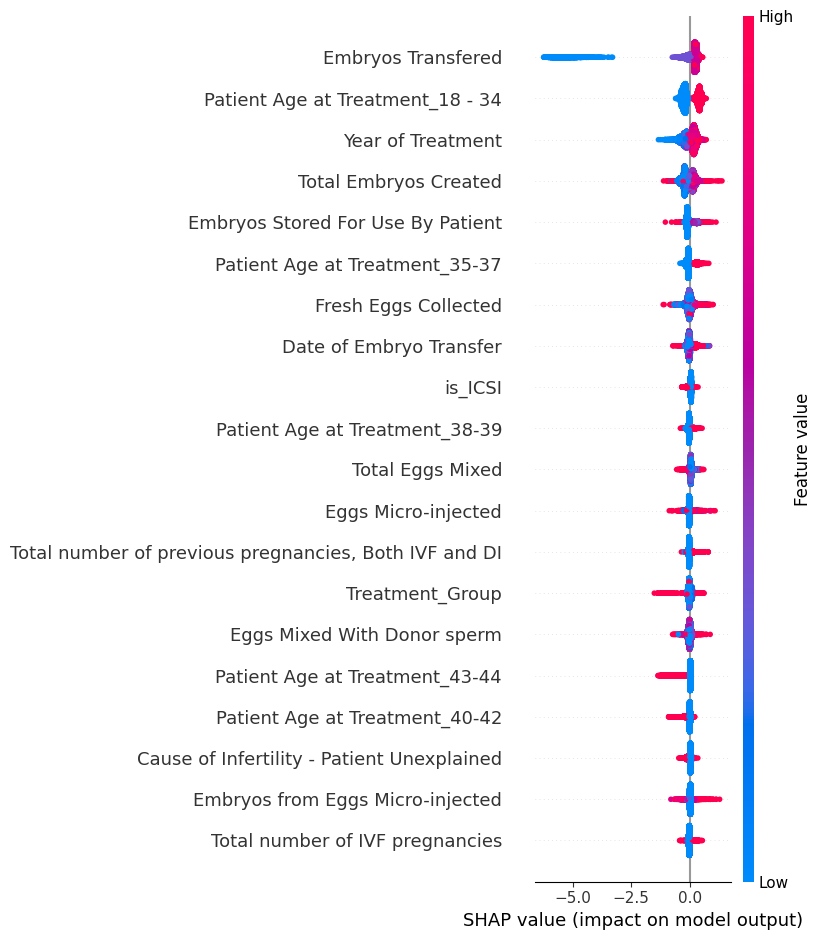

Model: CatBoostClassifier
Accuracy: 0.7514344262295082
Confusion Matrix:
[[14076   582]
 [ 4270   592]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.85     14658
           1       0.50      0.12      0.20      4862

    accuracy                           0.75     19520
   macro avg       0.64      0.54      0.52     19520
weighted avg       0.70      0.75      0.69     19520



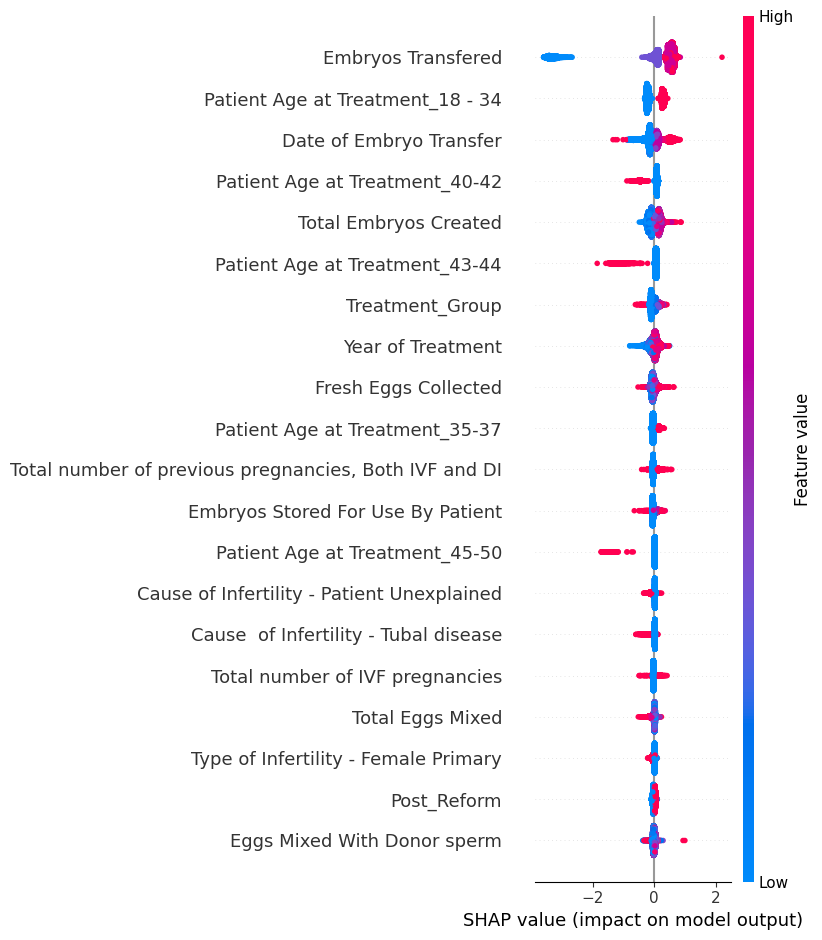

Model: LGBMClassifier
[LightGBM] [Info] Number of positive: 7250, number of negative: 22029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 29279, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247618 -> initscore=-1.111358
[LightGBM] [Info] Start training from score -1.111358
Accuracy: 0.7518954918032786
Confusion Matrix:
[[14176   482]
 [ 4361   501]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     14658
           1       0.51      0.10      0.17      4862

    accuracy                           0.75     19520
   macro avg       0.64      0.54      0.51     19520
weighted avg       0.70      0.75      0.68     19520



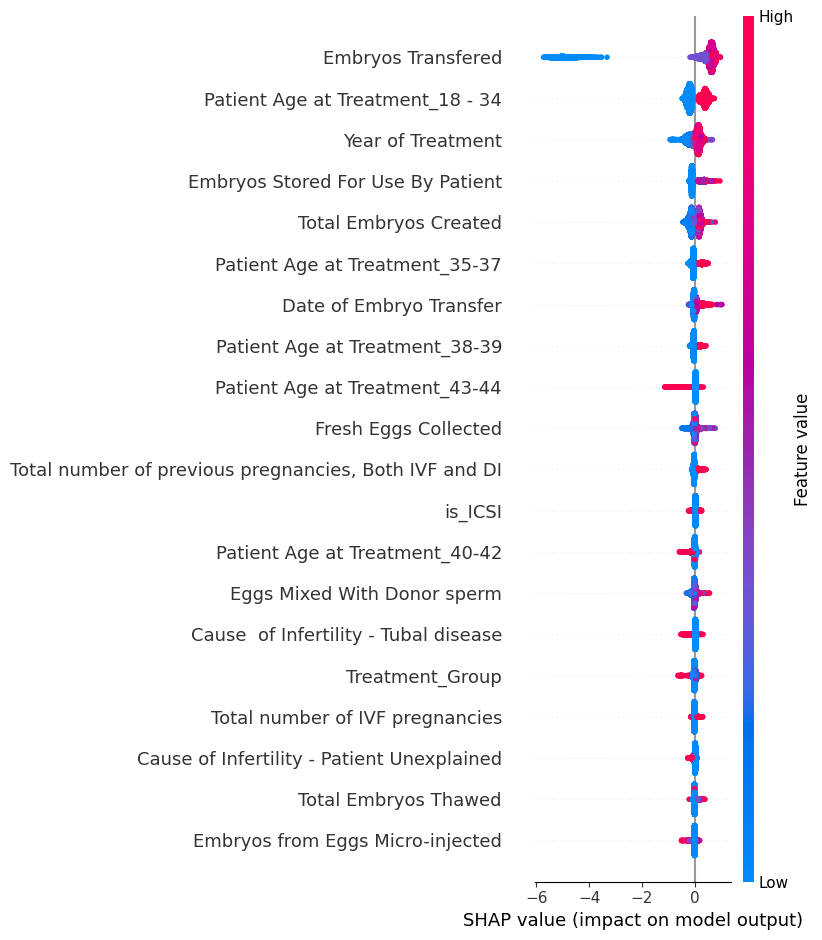

Birth Weight Lower Bound Regression
Model: XGBRegressor
MSE: 1.5770750104144804


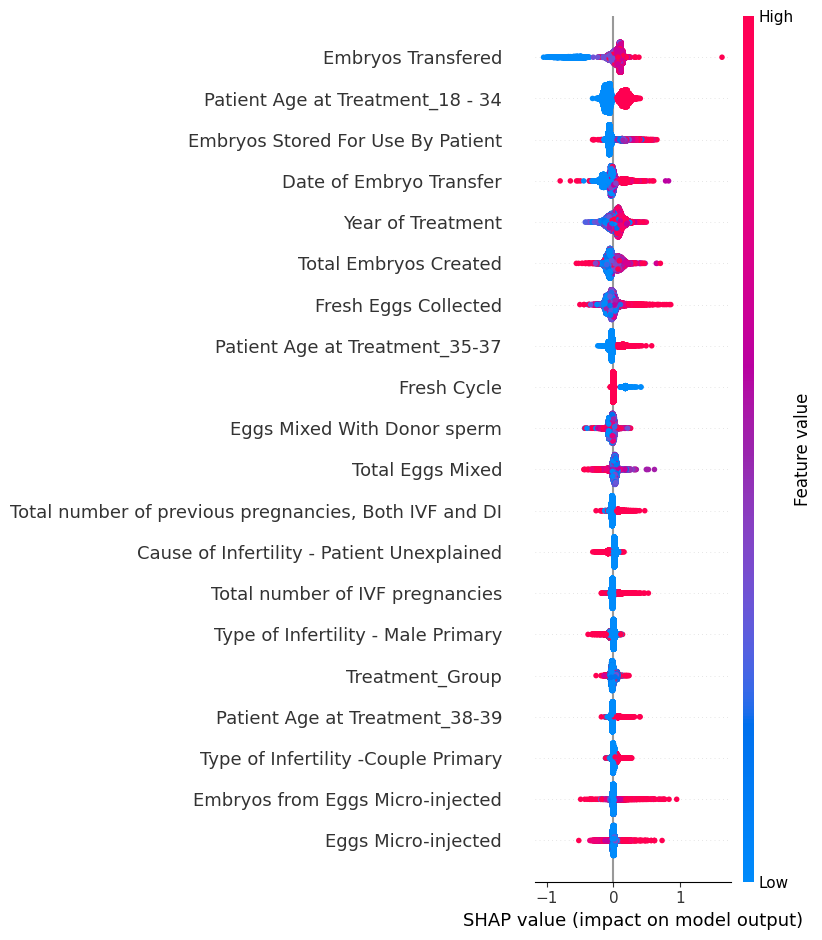

Model: CatBoostRegressor
MSE: 1.527250605622022


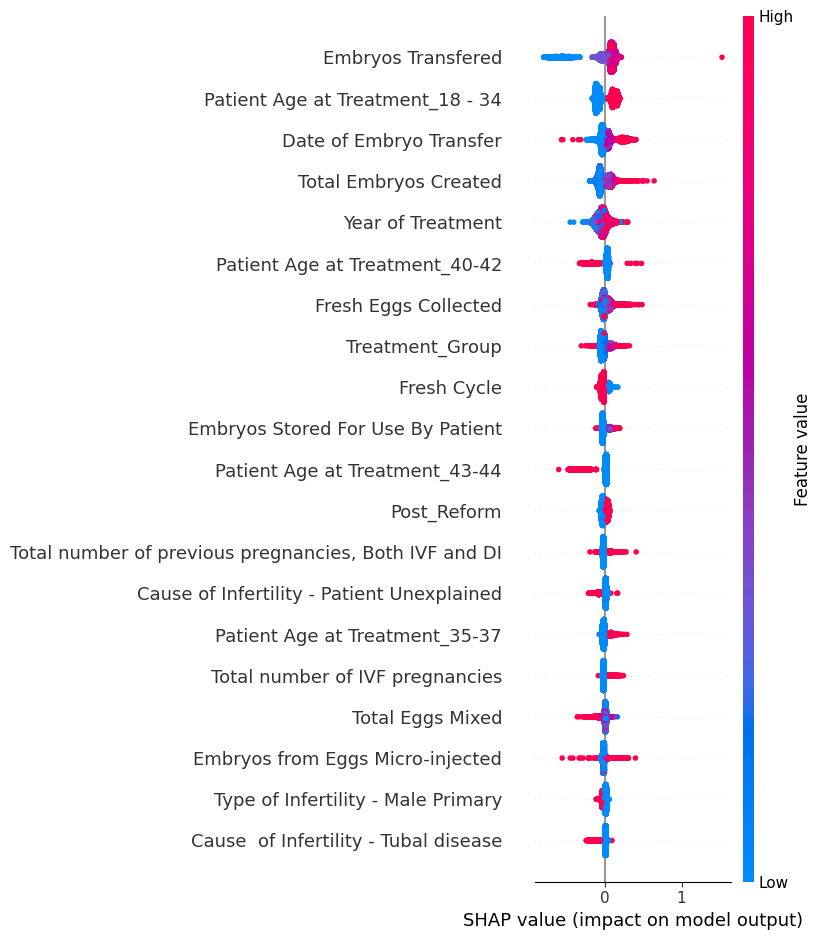

Model: LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 29279, number of used features: 60
[LightGBM] [Info] Start training from score 0.705745
MSE: 1.5201271819998112


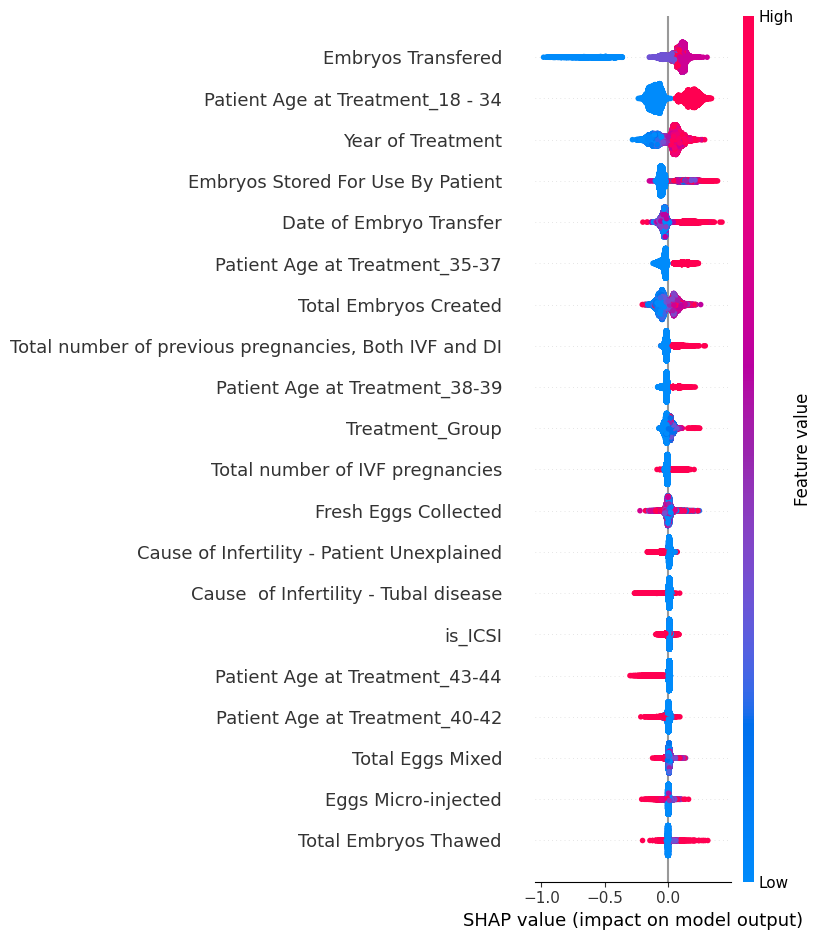

In [ ]:
# Train and evaluate classifiers for Heart One Success Birth
print("Heart One Success Birth Classification")
for name, clf in classifiers.items():
    print(f"Model: {name}")
    model = train_evaluate_classifier(clf, X_train_scaled, y_train_class1, X_test_scaled, y_test_class1)

    # SHAP values and feature importance plot
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test_scaled)
    shap.summary_plot(shap_values, X_test_scaled, feature_names=features.columns)

# # Train and evaluate classifiers for is_Pulsation
# print("is_Pulsation Classification")
# for name, clf in classifiers.items():
#     print(f"Model: {name}")
#     model = train_evaluate_classifier(clf, X_train_scaled, y_train_class2, X_test_scaled, y_test_class2)

#     # SHAP values and feature importance plot
#     explainer = shap.Explainer(model)
#     shap_values = explainer(X_test_scaled)
#     shap.summary_plot(shap_values, X_test_scaled, feature_names=features.columns)

# Train and evaluate regressors for Birth Weight Lower Bound
print("Birth Weight Lower Bound Regression")
for name, reg in regressors.items():
    print(f"Model: {name}")
    model = train_evaluate_regressor(reg, X_train_scaled, y_train_reg, X_test_scaled, y_test_reg)

    # SHAP values and feature importance plot
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test_scaled)
    shap.summary_plot(shap_values, X_test_scaled, feature_names=features.columns)


In [ ]:
features.columns

Index(['Date patient started trying to become pregnant OR date of last pregnancy',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility - Female Factors',
       'Cause of Infertility - Partner Sperm Concentration',
       'Cause of Infertility -  Partner Sperm Morphology',
       'Causes of Infertility - Partner Sperm Motility',
       'Cause of Infertility -  Partner Sperm Immunological factors',
       'Stimulation used', 'Donated embryo', 

Evaluating RandomForestClassifier...
Accuracy: 0.7238729508196722
Confusion Matrix:
[[13274  1322]
 [ 4068   856]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     14596
           1       0.39      0.17      0.24      4924

    accuracy                           0.72     19520
   macro avg       0.58      0.54      0.54     19520
weighted avg       0.67      0.72      0.68     19520



Evaluating LogisticRegression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.747233606557377
Confusion Matrix:
[[14173   423]
 [ 4511   413]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     14596
           1       0.49      0.08      0.14      4924

    accuracy                           0.75     19520
   macro avg       0.63      0.53      0.50     19520
weighted avg       0.69      0.75      0.67     19520



Evaluating KNeighborsClassifier...
Accuracy: 0.7038422131147541
Confusion Matrix:
[[12562  2034]
 [ 3747  1177]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81     14596
           1       0.37      0.24      0.29      4924

    accuracy                           0.70     19520
   macro avg       0.57      0.55      0.55     19520
weighted avg       0.67      0.70      0.68     19520



Evaluating GradientBoostingClassifier...
Accuracy: 0.7486168032786885
Confusion Matrix:
[[14183   413]
 [ 4494   430]]
              precision    recall

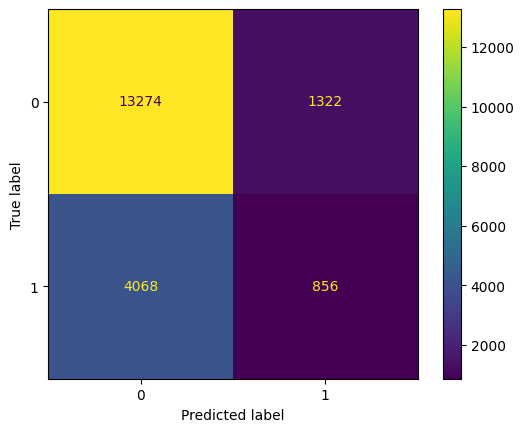

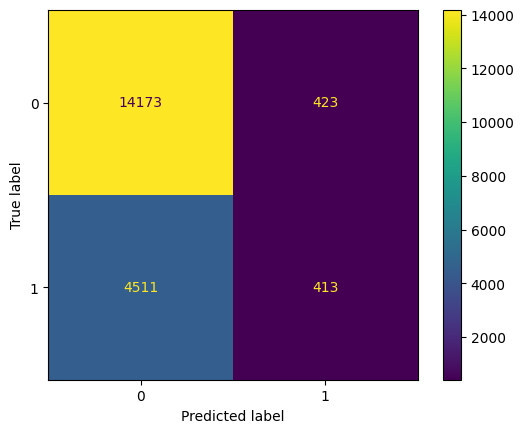

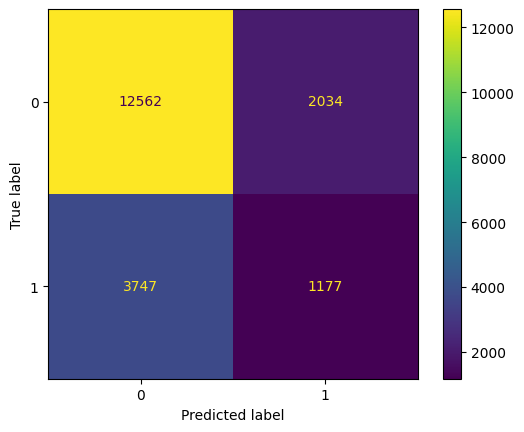

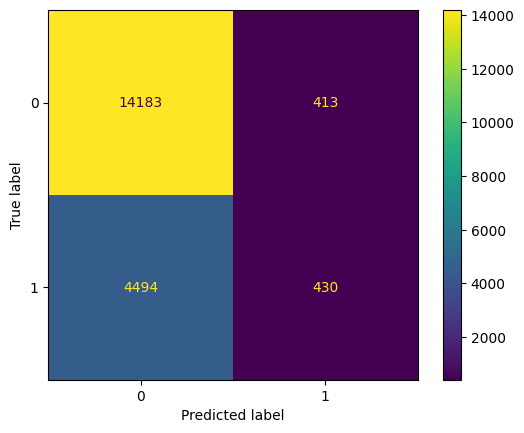

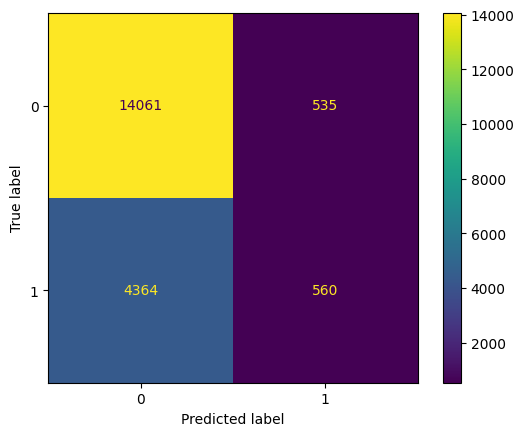

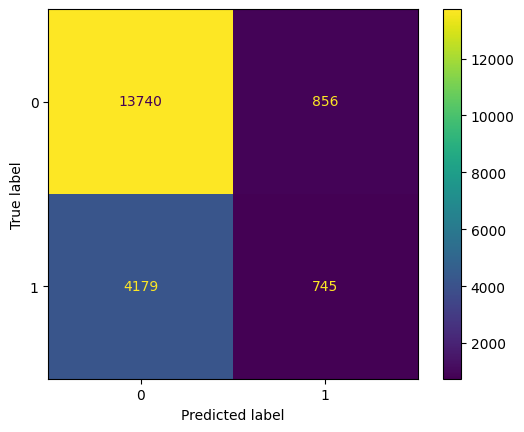

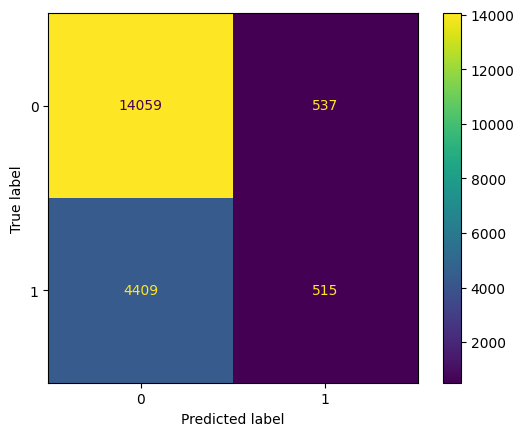

In [ ]:
df = df.drop(columns=['Heart One Success Birth','is_Pulsation'])

df = pd.get_dummies(df, columns=['Patient Age at Treatment', 'Sperm Donor Age at Registration'])
df = df.drop(columns=[
'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies','Heart One Birth Congenital Abnormalities','Number of Live Births'
])

# Define target variables
classification_targets = ['Live Birth Occurrence']
regression_target = 'Birth Weight Lower Bound'

# Define features
features = df.drop(columns=classification_targets + [regression_target])

# Split data into train and test sets
X_train, X_test, y_train_class1, y_test_class1 = train_test_split(features, df['Live Birth Occurrence'], test_size=0.4, random_state=42)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(features, df[regression_target], test_size=0.4, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    #'SVC': SVC(probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LGBMClassifier': lgb.LGBMClassifier()
}

# Function to train and evaluate classifiers
def train_evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(cm).plot()
    return clf

# Iterate over classifiers and evaluate each one
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    trained_clf = train_evaluate_classifier(clf, X_train_scaled, y_train_class1, X_test_scaled, y_test_class1)
    print("\n" + "="*60 + "\n")


In [ ]:
import optuna
import shap
from sklearn.metrics import f1_score

In [ ]:
def objective_knn(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_int('p', 1, 2)  # 1 for Manhattan, 2 for Euclidean
    }
    clf = KNeighborsClassifier(**params)
    clf.fit(X_train_scaled, y_train_class1)
    y_pred = clf.predict(X_test_scaled)
    f1 = f1_score(y_test_class1, y_pred, pos_label=1)
    return f1

# Define the objective function for RandomForestClassifier
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }
    clf = RandomForestClassifier(**params)
    clf.fit(X_train_scaled, y_train_class1)
    y_pred = clf.predict(X_test_scaled)
    f1 = f1_score(y_test_class1, y_pred, pos_label=1)
    return f1

# Define the objective function for XGBoost
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10, log=True),
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'use_label_encoder': False,
        'verbosity': 0,
    }
    clf = xgb.XGBClassifier(**params)
    clf.fit(X_train_scaled, y_train_class1)
    y_pred = clf.predict(X_test_scaled)
    f1 = f1_score(y_test_class1, y_pred, pos_label=1)
    return f1

In [ ]:
# Run Optuna optimization for KNN
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

print("Best hyperparameters for KNN:")
print(study_knn.best_params)

best_knn = KNeighborsClassifier(**study_knn.best_params)


[I 2024-07-12 03:23:29,101] A new study created in memory with name: no-name-08afe865-9291-400d-8902-7e83d135bd64
[I 2024-07-12 03:24:22,913] Trial 0 finished with value: 0.14848950332821303 and parameters: {'n_neighbors': 45, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.14848950332821303.
[I 2024-07-12 03:25:12,369] Trial 1 finished with value: 0.1837922895357986 and parameters: {'n_neighbors': 41, 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 0.1837922895357986.
[I 2024-07-12 03:25:19,176] Trial 2 finished with value: 0.28837546873109954 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'p': 2}. Best is trial 2 with value: 0.28837546873109954.
[I 2024-07-12 03:25:22,949] Trial 3 finished with value: 0.21438023820026467 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'p': 2}. Best is trial 2 with value: 0.28837546873109954.
[I 2024-07-12 03:26:10,439] Trial 4 finished with value: 0.25836065573770495 and parameters: {'n_neighbors': 10, '

Best hyperparameters for KNN:
{'n_neighbors': 1, 'weights': 'uniform', 'p': 2}


In [ ]:

# Run Optuna optimization for RandomForestClassifier
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

print("Best hyperparameters for RandomForestClassifier:")
print(study_rf.best_params)

best_rf = RandomForestClassifier(**study_rf.best_params)

[I 2024-07-12 03:34:48,035] A new study created in memory with name: no-name-c50a9680-fe95-4f1b-ad47-196ee7ab9f77
[I 2024-07-12 03:34:57,722] Trial 0 finished with value: 0.13491501416430596 and parameters: {'n_estimators': 220, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 9, 'bootstrap': False}. Best is trial 0 with value: 0.13491501416430596.
[I 2024-07-12 03:35:14,473] Trial 1 finished with value: 0.1285255265976437 and parameters: {'n_estimators': 389, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 10, 'bootstrap': False}. Best is trial 0 with value: 0.13491501416430596.
[I 2024-07-12 03:35:16,930] Trial 2 finished with value: 0.11592632719393284 and parameters: {'n_estimators': 65, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 10, 'bootstrap': False}. Best is trial 0 with value: 0.13491501416430596.
[I 2024-07-12 03:35:21,163] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 365, 'max_depth': 3, 'min_samples_split': 6,

Best hyperparameters for RandomForestClassifier:
{'n_estimators': 483, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}


In [ ]:
# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('knn', best_knn),
    ('rf', best_rf),
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train_class1)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
f1_ensemble = f1_score(y_test_class1, y_pred_ensemble, pos_label=1)
print(f"Ensemble Model F1 Score: {f1_ensemble}")


Ensemble Model F1 Score: 0.33665158371040727


In [ ]:
print(classification_report(y_test_class1, y_pred_ensemble))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77     14596
           1       0.33      0.34      0.34      4924

    accuracy                           0.66     19520
   macro avg       0.55      0.56      0.55     19520
weighted avg       0.66      0.66      0.66     19520

